# Housing Price Prediction

###### Data Exploration 


In [79]:
#Importing the basic librarires

import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [8]:
#Importing the dataset
test=pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

In [9]:
# look training data set
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
# look test data set
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [11]:
#Checking the dtypes of all the columns

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [12]:
#checking null value 
train.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

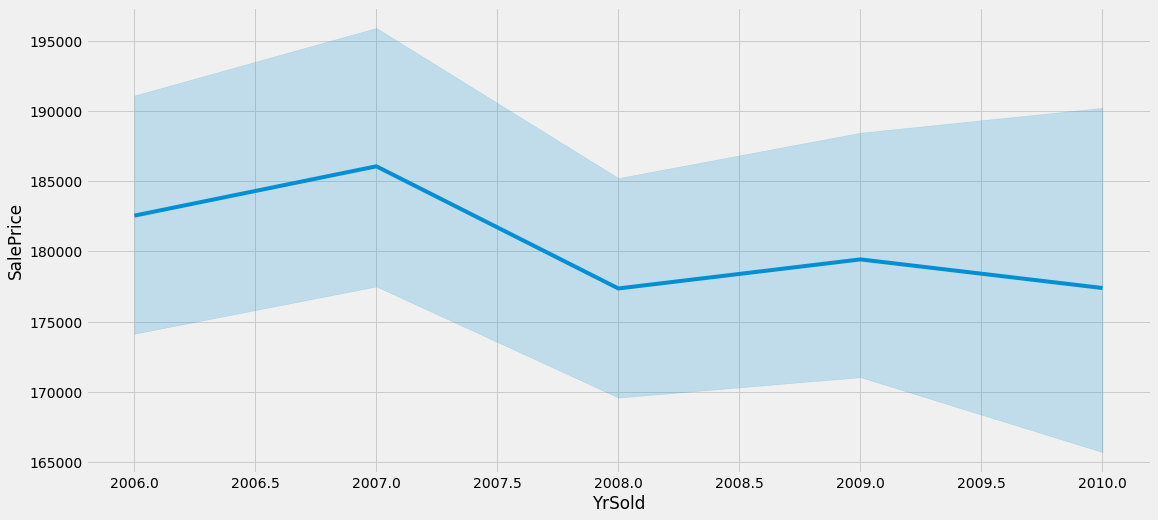

In [18]:
# let see how change the price for this years  

plt.style.use("fivethirtyeight")
plt.figure(figsize=(17,8))
sns.lineplot(data=train, x="YrSold",y="SalePrice")

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

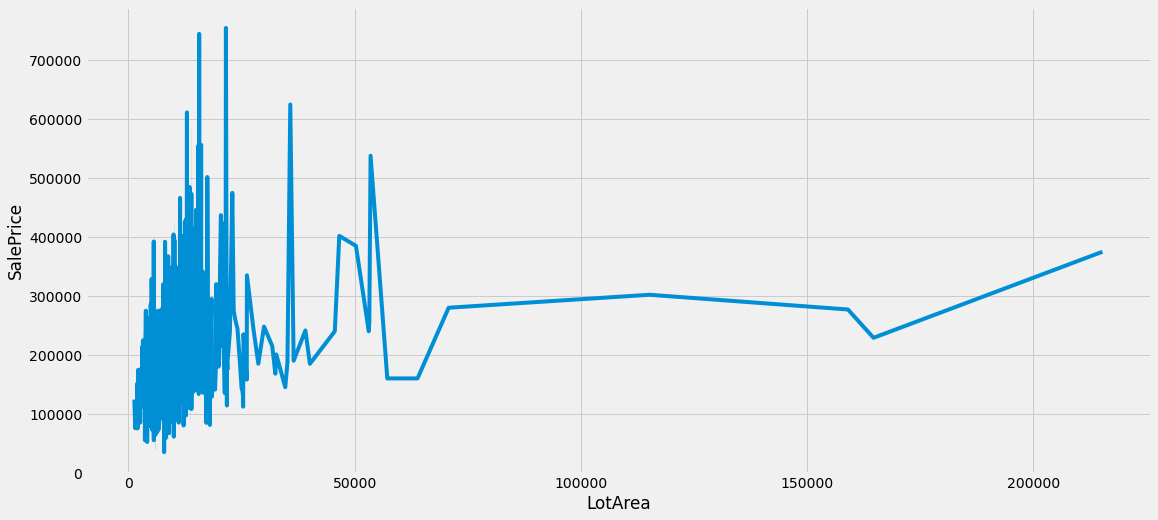

In [19]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(17,8))
sns.lineplot(data=train, x="LotArea",y="SalePrice")

In [22]:
#we have outlier , let check with box plot

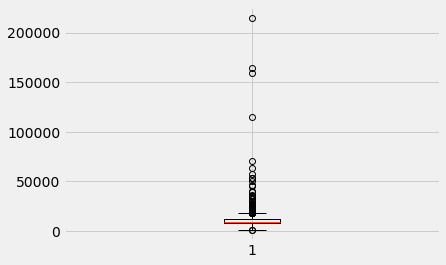

In [21]:
plt.boxplot(data=train,x="LotArea")
plt.show()

In [26]:
#let see how average price to the street

train.groupby("Street")["SalePrice"].mean()

Street
Grvl    130190.500000
Pave    181130.538514
Name: SalePrice, dtype: float64

## After take knowledge about the data let start building model

In [68]:
#Defined X value and y value 

X=train.drop(columns="SalePrice",axis=1).select_dtypes(exclude=['object'])
y=train['SalePrice']

In [69]:
X.drop(columns=["LotFrontage","GarageYrBlt"],inplace=True)

In [71]:
X['MasVnrArea'].mean()

103.68526170798899

In [74]:
X['MasVnrArea'].fillna(value=103,inplace=True)

In [75]:
X.isna().sum()

Id               0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [63]:
X

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0.0,0,0,...,460,0,40,0,0,0,0,0,8,2007
1456,1457,20,13175,6,6,1978,1988,119.0,790,163,...,500,349,0,0,0,0,0,0,2,2010
1457,1458,70,9042,7,9,1941,2006,0.0,275,0,...,252,0,60,0,0,0,0,2500,5,2010
1458,1459,20,9717,5,6,1950,1996,0.0,49,1029,...,240,366,0,112,0,0,0,0,4,2010


In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [66]:
X.shape

(1452, 35)

In [67]:
y.shape

(1460,)

In [77]:
print("X Train : ", X_train.shape)
print("X Test : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test : ", y_test.shape)

X Train :  (1168, 35)
X Test :  (292, 35)
Y Train :  (1168,)
Y Test :  (292,)


In [78]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [81]:
y_pred=model.predict(X_test)
y_pred

array([ 98159.47490777, 200645.15966506,  58612.49841816, 203760.22240285,
       232171.92044779, 157947.17913916,  49286.77148802, 130457.48738684,
       228013.54150746, 246924.64254558, 133500.12703725, 147315.54999644,
       209948.2100343 , 116943.4527478 , 214706.09004022, 210991.38956353,
       221569.68015677,  94247.07242839, 179401.16449845, 174258.03496959,
       194500.34652163, 202734.80483723, 189158.82759463, 178417.39558852,
       243876.82646214, 307421.4770385 , 189991.45346369, 286312.87313496,
       311455.11106391, 182201.01238386, 138788.30584981, 230559.97180536,
       169073.88707551,  75966.2911521 ,  69767.06801088, 256663.42505375,
       158697.05877447, 185956.64250109, 142454.83991845, 213312.14273173,
       180315.57293438, 154717.0000846 , 174658.3907886 , 194896.45285965,
       180612.64785993, 233931.83158541, 219142.71083756, 138813.80124444,
       123311.50226503,  99999.03671496, 137661.4861208 , 149728.11982596,
       321593.35998584, 1

In [84]:
mean_absolute_error(y_test,y_pred)

20885.14590854005

In [87]:
model.score(X,y)

0.8111203698943799

In [90]:
# make Decision Tree Regressor

decision_model = DecisionTreeRegressor()  
decision_model.fit(X_train, y_train) 

DecisionTreeRegressor()

### ---- The End ----